# Prediction of CO2 emissions from country-specific data
# A Machine Learning project 

***

# Stage 1: Data cleaning and preparation

***

### Notebook Contents:
0. Introduction - project and notebook summary, notes on the data source
1. Notebook setup - libraries and data import
2. Global data overview
3. Definition of the initial project goals
3. Data cleaning
    - dealing with missing values
    - transformation of the columns into a numerical data type
    - renaming of features
    - removing empty columns and rows
4. Data frame transformation
    - melting of the data for each variable
    - integration of the data into a suitable data frame format
5. Removal of missing values
    - detection of missing values
    - removal of missing values by filtering the columns and rows, so that minimal amount of features and rows are lost
    - detect outliers
5. Export the clean data frame to a csv file

***

## 0. Introduction

### Project summary
**Aim of the project**:
Analysis of country-specific data and development of machine learning models in order to predict CO2 emissions from country parameters. The project uses the publicly available dataset ESG Data from the World Bank Group, which provides data on the vast majority of countries over a range of years for parameters such as:

* country: the vast majority of countries worldwide
* year: ranging from 1990 to 2023
* CO2 emissions 
* population-specific parameter: Population density
* country economic indicators: GDP, GNI, Unemployment, etc.
* land-related parameters: Food production index, Agricultural land, and marine protected areas, Tree Cover Loss, etc.
* climate data: Nitrous oxide emissions, Cooling Degree Days, Heat Index 35 etc.
* energy use: Electricity production from coal sources, Renewable electricity output, Energy use, etc
* certain types of medical data: Life expectancy at birth, etc
* etc.



The project is divided into three stages:

1. Data cleaning and preparation
2. Data exploration and visualization
3. Predictive analysis with varios machine learning algorithms

Each of the stages is described in a separate Jupyter Notebook(.ipynp file).

***

### Notebook summary - Stage 1: Data cleaning and preparation
**Aim of this notebook**: The subject of this particular notebook is to explain the first stage of the project - the cleaning and transformation of the available data in order to prepare it for the visualization and analysis (described in further notebooks).

**Input**: comma separated values (CSV) file from the original online source

**Output**: comma separated values (CSV) file containing the cleaned data ready for visualization and analysis

**Programming language**: Python 3.8

**Libraries used in this notebook**: pandas, numpy

***

### Data source

The used data comes from the Environment, Social And Governance Data of the World Bank Group, which provides country-specific data on parameters such as CO2 emissions, energy use, Population density, Agricultural land, GDP, GNI, etc.


The dataset is publicly available at https://datacatalog.worldbank.org/search/dataset/0037651/Environment--Social-and-Governance-Data and licenced under the <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International license</a>.

***


## 1. Notebook Setup
Import all needed libraries:

In [102]:
import pandas as pd
import numpy as np

In [103]:
# adjusting the path to the file is necessary, because the script is not executed in the same directory as the file
# import os
# print(os.getcwd()) # get current working directory to see where the script is executed

# Load the data into a DataFrame
file_path = 'Desktop/1.Semester/MachineLearing/Project/CO2/data/ESGEXCEL.csv' # please adjust the path to the file

try:
    data = pd.read_csv(file_path, delimiter=';', on_bad_lines='warn')
except pd.errors.ParserError as e:
    print(f"Error parsing CSV: {e}")

***

## 2. Global data overview

A global overview of the imported data 

In [104]:
print("Shape of the original dataset:")
data.shape

Shape of the original dataset:


(16969, 68)

In [105]:
# Inspect the columns of the DataFrame
print("Columns in the DataFrame:", data.columns)
print("Column data types:")
data.dtypes

Columns in the DataFrame: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')
Column data types:


Country Name      object
Country Code      object
Indicator Name    object
Indicator Code    object
1960              object
1961              object
1962              object
1963              object
1964              object
1965              object
1966              object
1967              object
1968              object
1969              object
1970              object
1971              object
1972              object
1973              object
1974              object
1975              object
1976              object
1977              object
1978              object
1979              object
1980              object
1981              object
1982              object
1983              object
1984              object
1985              object
1986              object
1987              object
1988              object
1989              object
1990              object
1991              object
1992              object
1993              object
1994              object
1995              object


In [106]:
# Display the first few rows of the transformed DataFrame
print("Overview of the first 5 rows in the DataFrame:")
data.head()

Overview of the first 5 rows in the DataFrame:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"74,99872508","76,63851276","78,08422199","79,31725582","80,41259463","81,43646335","82,36431321","83,15356134","83,85274424","84,52017508","84,99548885","85,54506142","86,02447647","86,40648705","86,70571737","86,94277798","87,22870518","87,39085552","87,61786211","87,79873981","87,94826443","88,09253583",NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"76,96432583","77,6235207","78,52140883","79,11231964","81,10885149","81,93622292","81,90401869","82,88821871","82,8302878","83,5904598","85,81586844","84,15250124","83,83835947","84,73583825","87,482231","87,71956908","87,40250163","89,34070478","88,83227593","89,05385159","89,53901606","90,66275374","89,17693883","90,35280229","90,63505001","90,84566129",NaN,NaN
2,Arab World,ARB,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5,961206708","6,065468844","8,242518979","11,30272159","24,10877186","16,68383784","18,46105673","18,37796635","15,88419605","33,64366968","27,42701307","20,1617884","11,28580118","9,75367784","9,670800064","8,289274245","5,416471693","6,875435326","5,765414262","7,849742333","7,983243533","8,360680722","8,124148288","8,070242903","8,245935643","7,84568875","9,076897295","7,773419958","5,479318201","6,976811419","9,377097353","7,561574075","7,352449669","8,647152901","10,05613866","12,06270116","12,15649292","11,13041899","12,79464121","7,994157471","9,292305999","12,66539654","12,1995662","11,17604881","10,05055446","6,130654513","5,265859073","6,245422284","8,187713883","7,234435527","4,598505988",NaN,NaN,NaN
3,Arab World,ARB,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,174568006","0,139286897","0,132084","0,15242404","0,087390171","0,0987598","0,066340922","0,102411107","0,107102567","0,0742278","0,057759966","0,055111252","0,114143824","0,081488608","0,079540665","0,038305691","0,089655694","0,08506804","0,089701999","0,087329604","0,067230452","0,071938541","0,057122438","0,044027288","0,04594897","0,0622633","0,058694213","0,05524172","0,077564685","0,036728546","0,021056102","0,024408853","0,026640651","0,032389863","0,024895497","0,020664104","0,021368902","0,017942684","0,02493817","0,02874561","0,029684355","0,030113064","0,033493734","0,065107526","0,084360637","0,096672323","0,092911395","0,102683973","0,057123056","0,064515779","0,075685583",NaN,NaN,NaN
4,Arab World,ARB,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,"30,9814141","30,98266305","31,00705428","31,01800095","31,04246564","31,05040014","31,10322331","31,13356541","31,19042929","31,254493","31,38658766","31,4999481","31,49680808","31,55080689","31,52964818","31,59973643","31,62199716","31,66607782","31,67849388","31,75886761","31,45431432","31,48030281","31,52874746","31,94226961","32,44217664","33,02653928","33,58299885","34,18697738","34,69778409","35,10945338","35,15997717","35,3210827","36,09618122","36,75065389","37,38082592","37,97764104","38,48846262","39,09635346","39,6221896","39,65694078","39,67975145","39,75299681","39,94156576","39,99125266","40,04847798","40,11976586","40,17216897","40,11155965","40,12213099","40,16030262","40,17641904","39,78996696","39,83

In [107]:
print("Descriptive statistics of the columns:")
data.describe()

Descriptive statistics of the columns:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,16969,16969,16969,16969,1623,2156,2165,2170,2175,2212,2213,2221,2232,2240,3423,3931,3931,3931,3937,4315,4274,4278,4286,4300,4608,4623,4559,4565,4601,4698,4688,4749,4738,4785,7138,7490,7655,7742,7794,8123,9300,8365,9563,8556,11430,9996,11362,11371,11542,11890,11664,11849,11808,11820,12346,12127,12239,12412,12509,12390,11783,11577,11710,11440,10731,7215,3640,453
unique,239,239,71,71,1541,2078,2090,2089,2095,2126,2139,2149,2161,2168,3091,3525,3512,3537,3527,3824,3804,3808,3819,3842,4108,4113,4056,4074,4085,4184,4177,4231,4222,4255,6169,6571,6717,6799,6912,7229,8364,7485,8613,7658,10202,8716,9948,9926,10101,10393,10105,10309,10263,10258,10739,10537,10621,10657,10724,10621,10136,10025,9972,9988,9467,6334,3543,445
top,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,100,"6,235160271"
freq,71,71,239,239,27,17,17,16,15,21,15,14,11,13,235,294,292,282,291,296,295,288,287,290,279,282,284,267,285,283,276,266,259,284,590,526,509,494,472,433,379,374,355,383,375,369,384,386,424,404,409,407,388,384,366,379,372,377,372,367,266,271,280,265,268,178,15,3


In [108]:
# get more information about the columns
data['Indicator Name'].unique() 

array(['Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Adjusted savings: natural resources depletion (% of GNI)',
       'Adjusted savings: net forest depletion (% of GNI)',
       'Agricultural land (% of land area)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Annualized average growth rate in per capita real survey mean consumption or income, total population (%)',
       'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)',
       'Children in employment, total (% of children ages 7-14)',
       'CO2 emissions (metric tons per capita)', 'Coastal protection',
       'Control of Corruption: Estimate', 'Cooling Degree Days',
       'Economic and Social Rights Performance Score',
       'Electricity production from coal sources (% of total)',
       '

In [109]:
data['Indicator Code'].unique()

array(['EG.CFT.ACCS.ZS', 'EG.ELC.ACCS.ZS', 'NY.ADJ.DRES.GN.ZS',
       'NY.ADJ.DFOR.GN.ZS', 'AG.LND.AGRI.ZS', 'NV.AGR.TOTL.ZS',
       'ER.H2O.FWTL.ZS', 'SI.SPR.PCAP.ZG', 'SH.DTH.COMM.ZS',
       'SL.TLF.0714.ZS', 'EN.ATM.CO2E.PC', 'EN.CLC.CSTP.ZS', 'CC.EST',
       'EN.CLC.CDDY.XD', 'SD.ESR.PERF.XQ', 'EG.ELC.COAL.ZS',
       'EG.IMP.CONS.ZS', 'EG.EGY.PRIM.PP.KD', 'EG.USE.PCAP.KG.OE',
       'SP.DYN.TFRT.IN', 'AG.PRD.FOOD.XD', 'AG.LND.FRST.ZS',
       'EG.USE.COMM.FO.ZS', 'NY.GDP.MKTP.KD.ZG', 'EN.CLC.GHGR.MT.CE',
       'SI.POV.GINI', 'GE.EST', 'SE.XPD.TOTL.GB.ZS', 'EN.CLC.HEAT.XD',
       'EN.CLC.HDDY.XD', 'SH.MED.BEDS.ZS', 'SI.DST.FRST.20',
       'IT.NET.USER.ZS', 'SL.TLF.ACTI.ZS', 'EN.LND.LTMP.DC',
       'ER.H2O.FWST.ZS', 'SP.DYN.LE00.IN', 'SE.ADT.LITR.ZS',
       'EN.MAM.THRD.NO', 'EN.ATM.METH.PC', 'SH.DYN.MORT', 'SM.POP.NETM',
       'EN.ATM.NOXE.PC', 'IP.PAT.RESD', 'SH.H2O.SMDW.ZS',
       'SH.STA.SMSS.ZS', 'EN.ATM.PM25.MC.M3', 'PV.EST',
       'SP.POP.65UP.TO.ZS', 'EN.POP.DNST

In [110]:
data['Country Name'].unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean (IDA & IBRD)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)

### Findings from the global overview**

This global overview gives away the following facts about the available data:

- shape: 68 columns, 16969 rows
- all columns are of type "object" - neither numeric, nor string/text values
A certain amount of missing values, denoted as NaN (not a number values)
- The columns represent key values such as country, but also the corresponding years and the indicator code/name
- The columns 'Country Code' and 'Indicator Code' do not give any important information and are therefore obsolete
- The column 'Indicator Name' contains the country-specific features required for the analysis
- The names of the features in the column 'Indicator Name' are clear but too long

*** 

## 3. Define the initial project goals

The first overview of the raw data allows to define initial goals and objectives of the machine learning project. These will be refined in the future as more information insight is gained from the data. However, this initial goal definition will help develop a strategy and organize the data cleaning, transformation and visualization.

The data series available can be summarized into the following country-specific parameter/feature categories:

* target variable: CO2 emissions 

Features:

* country: the vast majority of countries worldwide
* year: ranging from 1990 to 2023
* population-specific parameter: Population density
* country economic indicators: GDP, GNI, Unemployment, etc.
* land-related parameters: Food production index, Agricultural land, and marine protected areas, Tree Cover Loss, etc.
* climate data: Nitrous oxide emissions, Cooling Degree Days, Heat Index 35 etc.
* energy use: Electricity production from coal sources, Renewable electricity output, Energy use, etc
* certain types of medical data: Life expectancy at birth, etc
* etc.

Such a dataset would suggest to investigate the influence of country-specific parameters such as economic parameres, population, energy use, land use and others on climate-related data or the factors affecting the climate like emissions, precipitations, etc.

**Initial goal of the machine learning project:** Analyze the relationships among these variable categories and evaluate the contribution of factors like country economy, energy use, land use, etc. on greenhouse gas emissions, precipitations, etc. Finally, develop a machine learning model capable of predicting climate-related data or emissions from the other country-specific parameters.

As more data insight will be gained with along the course of the project, the definition of these goals will be refined in more detail.

***

## 4. Data cleaning

### Organization of the data cleaning and transformation

The main aim of the data cleaning and transformation is to represent the features (the country parameters contained in the column *'Indicator Name'*) as separate columns and to make each row identifiable by a country and a year. At the same time, it would make sense to transform the years into a single column.

Additionally, it is necessary to get rid of empty rows or columns and deal with the remaining cells with missing values.

For these purposes, the following tasks have to be undertaken:

1. Remove the unnecessary columns "Country Code", "Indicator Code"
2. Transform the year columns into a numerical data type
3. Rename the features in column "Indicator Name"

### 4.1 Removing the unnecessary columns "Country Code", "Indicator Code"

In [111]:
# assign the data to a new DataFrame, which will be modified
data_clean = data

print("Original number of columns:")
print(data_clean.shape[1])

data_clean = data_clean.drop(['Country Code', 'Indicator Code'], axis='columns')

print("Current number of columns:")
print(data_clean.shape[1])

Original number of columns:
68
Current number of columns:
66


### 4.2 Transform the year columns into a numerical data type

In [112]:
data_clean.head()

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Arab World,Access to clean fuels and technologies for coo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"74,99872508","76,63851276","78,08422199","79,31725582","80,41259463","81,43646335","82,36431321","83,15356134","83,85274424","84,52017508","84,99548885","85,54506142","86,02447647","86,40648705","86,70571737","86,94277798","87,22870518","87,39085552","87,61786211","87,79873981","87,94826443","88,09253583",NaN,NaN
1,Arab World,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"76,96432583","77,6235207","78,52140883","79,11231964","81,10885149","81,93622292","81,90401869","82,88821871","82,8302878","83,5904598","85,81586844","84,15250124","83,83835947","84,73583825","87,482231","87,71956908","87,40250163","89,34070478","88,83227593","89,05385159","89,53901606","90,66275374","89,17693883","90,35280229","90,63505001","90,84566129",NaN,NaN
2,Arab World,Adjusted savings: natural resources depletion ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5,961206708","6,065468844","8,242518979","11,30272159","24,10877186","16,68383784","18,46105673","18,37796635","15,88419605","33,64366968","27,42701307","20,1617884","11,28580118","9,75367784","9,670800064","8,289274245","5,416471693","6,875435326","5,765414262","7,849742333","7,983243533","8,360680722","8,124148288","8,070242903","8,245935643","7,84568875","9,076897295","7,773419958","5,479318201","6,976811419","9,377097353","7,561574075","7,352449669","8,647152901","10,05613866","12,06270116","12,15649292","11,13041899","12,79464121","7,994157471","9,292305999","12,66539654","12,1995662","11,17604881","10,05055446","6,130654513","5,265859073","6,245422284","8,187713883","7,234435527","4,598505988",NaN,NaN,NaN
3,Arab World,Adjusted savings: net forest depletion (% of GNI),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,174568006","0,139286897","0,132084","0,15242404","0,087390171","0,0987598","0,066340922","0,102411107","0,107102567","0,0742278","0,057759966","0,055111252","0,114143824","0,081488608","0,079540665","0,038305691","0,089655694","0,08506804","0,089701999","0,087329604","0,067230452","0,071938541","0,057122438","0,044027288","0,04594897","0,0622633","0,058694213","0,05524172","0,077564685","0,036728546","0,021056102","0,024408853","0,026640651","0,032389863","0,024895497","0,020664104","0,021368902","0,017942684","0,02493817","0,02874561","0,029684355","0,030113064","0,033493734","0,065107526","0,084360637","0,096672323","0,092911395","0,102683973","0,057123056","0,064515779","0,075685583",NaN,NaN,NaN
4,Arab World,Agricultural land (% of land area),NaN,"30,9814141","30,98266305","31,00705428","31,01800095","31,04246564","31,05040014","31,10322331","31,13356541","31,19042929","31,254493","31,38658766","31,4999481","31,49680808","31,55080689","31,52964818","31,59973643","31,62199716","31,66607782","31,67849388","31,75886761","31,45431432","31,48030281","31,52874746","31,94226961","32,44217664","33,02653928","33,58299885","34,18697738","34,69778409","35,10945338","35,15997717","35,3210827","36,09618122","36,75065389","37,38082592","37,97764104","38,48846262","39,09635346","39,6221896","39,65694078","39,67975145","39,75299681","39,94156576","39,99125266","40,04847798","40,11976586","40,17216897","40,11155965","40,12213099","40,16030262","40,17641904","39,78996696","39,83865017","39,8344215","39,87257452","39,93781393","39,98445203","39,96973753","39,90703091","39,97329048","39,97074236",NaN,NaN


In [113]:
print(data_clean.dtypes)

Country Name      object
Indicator Name    object
1960              object
1961              object
1962              object
1963              object
1964              object
1965              object
1966              object
1967              object
1968              object
1969              object
1970              object
1971              object
1972              object
1973              object
1974              object
1975              object
1976              object
1977              object
1978              object
1979              object
1980              object
1981              object
1982              object
1983              object
1984              object
1985              object
1986              object
1987              object
1988              object
1989              object
1990              object
1991              object
1992              object
1993              object
1994              object
1995              object
1996              object
1997              object


In [114]:
# Function to clean numeric columns starting from the second column
def clean_numeric_columns(df):
    for col in df.columns[2:]:  # Skip the first two columns        
        # Remove extra whitespace, replace commas with dots, and convert to numeric
        df[col] = df[col].str.strip().str.replace(',', '.', regex=True)  # Make sure to assign the result back to the column
        
        # Convert to numeric
        df[col] = pd.to_numeric(df[col]) 
        
    return df

# Apply the function to your dataset
data_clean2 = clean_numeric_columns(data_clean.copy())


In [115]:
data_clean2.head()

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Arab World,Access to clean fuels and technologies for coo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.998725,76.638513,78.084222,79.317256,80.412595,81.436463,82.364313,83.153561,83.852744,84.520175,84.995489,85.545061,86.024476,86.406487,86.705717,86.942778,87.228705,87.390856,87.617862,87.798740,87.948264,88.092536,NaN,NaN
1,Arab World,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.964326,77.623521,78.521409,79.112320,81.108851,81.936223,81.904019,82.888219,82.830288,83.590460,85.815868,84.152501,83.838359,84.735838,87.482231,87.719569,87.402502,89.340705,88.832276,89.053852,89.539016,90.662754,89.176939,90.352802,90.635050,90.845661,NaN,NaN
2,Arab World,Adjusted savings: natural resources depletion ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.961207,6.065469,8.242519,11.302722,24.108772,16.683838,18.461057,18.377966,15.884196,33.643670,27.427013,20.161788,11.285801,9.753678,9.670800,8.289274,5.416472,6.875435,5.765414,7.849742,7.983244,8.360681,8.124148,8.070243,8.245936,7.845689,9.076897,7.773420,5.479318,6.976811,9.377097,7.561574,7.352450,8.647153,10.056139,12.062701,12.156493,11.130419,12.794641,7.994157,9.292306,12.665397,12.199566,11.176049,10.050554,6.130655,5.265859,6.245422,8.187714,7.234436,4.598506,NaN,NaN,NaN
3,Arab World,Adjusted savings: net forest depletion (% of GNI),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.174568,0.139287,0.132084,0.152424,0.087390,0.098760,0.066341,0.102411,0.107103,0.074228,0.057760,0.055111,0.114144,0.081489,0.079541,0.038306,0.089656,0.085068,0.089702,0.087330,0.067230,0.071939,0.057122,0.044027,0.045949,0.062263,0.058694,0.055242,0.077565,0.036729,0.021056,0.024409,0.026641,0.032390,0.024895,0.020664,0.021369,0.017943,0.024938,0.028746,0.029684,0.030113,0.033494,0.065108,0.084361,0.096672,0.092911,0.102684,0.057123,0.064516,0.075686,NaN,NaN,NaN
4,Arab World,Agricultural land (% of land area),NaN,30.981414,30.982663,31.007054,31.018001,31.042466,31.0504,31.103223,31.133565,31.190429,31.254493,31.386588,31.499948,31.496808,31.550807,31.529648,31.599736,31.621997,31.666078,31.678494,31.758868,31.454314,31.480303,31.528747,31.942270,32.442177,33.026539,33.582999,34.186977,34.697784,35.109453,35.159977,35.321083,36.096181,36.750654,37.380826,37.977641,38.488463,39.096353,39.622190,39.656941,39.679751,39.752997,39.941566,39.991253,40.048478,40.119766,40.172169,40.111560,40.122131,40.160303,40.176419,39.789967,39.838650,39.834421,39.872575,39.937814,39.984452,39.969738,39.907031,39.973290,39.970742,NaN,NaN


In [116]:
data_clean2.dtypes

Country Name       object
Indicator Name     object
1960              float64
1961              float64
1962              float64
1963              float64
1964              float64
1965              float64
1966              float64
1967              float64
1968              float64
1969              float64
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
1986              float64
1987              float64
1988              float64
1989              float64
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996        

### 4.3 Rename the features in column "Indicator Name"

The variable/feature names in the column *'Indicator Name'* are clear, but too long and not practical to use in the code. In order to improve that, the feature names will be renamed with shorter labels as indicated in the following table:

<table>
    <tr>
        <td> <b>Variable name</b> </td>
        <td> <b>Description</b> </td>
        <td> <b>Unit</b> </td>
    </tr>
    <tr>
        <td> clean_fuel_access_perc </td>
        <td> Access to clean fuels and technologies for cooking </td>
        <td> % of population </td>
    </tr>
    <tr>
        <td> elec_access_perc </td>
        <td> Access to electricity </td>
        <td> % of population </td>
    </tr>
    <tr>
        <td> nat_res_depl_perc </td>
        <td> Adjusted savings: natural resources depletion </td>
        <td> % of GNI </td>
    </tr>
    <tr>
        <td> forest_depl_perc </td>
        <td> Adjusted savings: net forest depletion </td>
        <td> % of GNI </td>
    </tr>
    <tr>
        <td> agri_land_perc </td>
        <td> Agricultural land </td>
        <td> % of land area </td>
    </tr>
    <tr>
        <td> agri_forest_fish_val_perc </td>
        <td> Agriculture, forestry, and fishing, value added </td>
        <td> % of GDP </td>
    </tr>
    <tr>
        <td> freshwater_withdrawal_perc </td>
        <td> Annual freshwater withdrawals, total </td>
        <td> % of internal resources </td>
    </tr>
    <tr>
        <td> avg_growth_rate_consumption_income_perc </td>
        <td> Annualized average growth rate in per capita real survey mean consumption or income, total population </td>
        <td> % </td>
    </tr>
    <tr>
        <td> death_communicable_diseases_perc </td>
        <td> Cause of death, by communicable diseases and maternal, prenatal, and nutrition conditions </td>
        <td> % of total </td>
    </tr>
    <tr>
        <td> children_employment_perc </td>
        <td> Children in employment, total </td>
        <td> % of children ages 7-14 </td>
    </tr>
    <tr>
        <td> co2_emissions_per_capita </td>
        <td> CO2 emissions </td>
        <td> metric tons per capita </td>
    </tr>
    <tr>
        <td> coastal_protection </td>
        <td> Coastal protection </td>
        <td> </td>
    </tr>
    <tr>
        <td> corruption_control_est </td>
        <td> Control of Corruption: Estimate </td>
        <td> Estimate </td>
    </tr>
    <tr>
        <td> cooling_degree_days </td>
        <td> Cooling Degree Days </td>
        <td> </td>
    </tr>
    <tr>
        <td> econ_social_rights_score </td>
        <td> Economic and Social Rights Performance Score </td>
        <td> </td>
    </tr>
    <tr>
        <td> elec_prod_coal_perc </td>
        <td> Electricity production from coal sources </td>
        <td> % of total </td>
    </tr>
    <tr>
        <td> energy_imports_net_perc </td>
        <td> Energy imports, net </td>
        <td> % of energy use </td>
    </tr>
    <tr>
        <td> energy_intensity_primary_energy </td>
        <td> Energy intensity level of primary energy </td>
        <td> MJ/$2017 PPP GDP </td>
    </tr>
    <tr>
        <td> energy_use_per_capita </td>
        <td> Energy use </td>
        <td> kilograms of oil equivalent per capita </td>
    </tr>
    <tr>
        <td> fertility_rate </td>
        <td> Fertility rate, total </td>
        <td> births per woman </td>
    </tr>
    <tr>
        <td> food_prod_index </td>
        <td> Food production index </td>
        <td> 2014-2016 = 100 </td>
    </tr>
    <tr>
        <td> forest_area_perc </td>
        <td> Forest area </td>
        <td> % of land area </td>
    </tr>
    <tr>
        <td> fossil_fuel_energy_consumption_perc </td>
        <td> Fossil fuel energy consumption </td>
        <td> % of total </td>
    </tr>
    <tr>
        <td> gdp_growth_perc </td>
        <td> GDP growth </td>
        <td> annual % </td>
    </tr>
    <tr>
        <td> ghg_net_emissions_lucf </td>
        <td> GHG net emissions/removals by LUCF </td>
        <td> Mt of CO2 equivalent </td>
    </tr>
    <tr>
        <td> gini_index </td>
        <td> Gini index </td>
        <td> </td>
    </tr>
    <tr>
        <td> gov_effectiveness_est </td>
        <td> Government Effectiveness: Estimate </td>
        <td> Estimate </td>
    </tr>
    <tr>
        <td> gov_expenditure_education_perc </td>
        <td> Government expenditure on education, total </td>
        <td> % of government expenditure </td>
    </tr>
    <tr>
        <td> heat_index_35 </td>
        <td> Heat Index 35 </td>
        <td> </td>
    </tr>
    <tr>
        <td> heating_degree_days </td>
        <td> Heating Degree Days </td>
        <td> </td>
    </tr>
    <tr>
        <td> hospital_beds_per_1000 </td>
        <td> Hospital beds </td>
        <td> per 1,000 people </td>
    </tr>
    <tr>
        <td> income_share_lowest_20 </td>
        <td> Income share held by lowest 20% </td>
        <td> </td>
    </tr>
    <tr>
        <td> internet_usage_perc </td>
        <td> Individuals using the Internet </td>
        <td> % of population </td>
    </tr>
    <tr>
        <td> labor_force_participation_perc </td>
        <td> Labor force participation rate, total </td>
        <td> % of total population ages 15-64 </td>
    </tr>
    <tr>
        <td> land_surface_temp </td>
        <td> Land Surface Temperature </td>
        <td> </td>
    </tr>
    <tr>
        <td> water_stress_level </td>
        <td> Level of water stress: freshwater withdrawal as a proportion of available freshwater resources </td>
        <td> </td>
    </tr>
    <tr>
        <td> life_expectancy </td>
        <td> Life expectancy at birth, total </td>
        <td> years </td>
    </tr>
    <tr>
        <td> literacy_rate_adult </td>
        <td> Literacy rate, adult total </td>
        <td> % of people ages 15 and above </td>
    </tr>
    <tr>
        <td> mammal_species_threatened </td>
        <td> Mammal species, threatened </td>
        <td> </td>
    </tr>
    <tr>
        <td> methane_emissions_per_capita </td>
        <td> Methane emissions </td>
        <td> metric tons of CO2 equivalent per capita </td>
    </tr>
    <tr>
        <td> mortality_rate_under_5 </td>
        <td> Mortality rate, under-5 </td>
        <td> per 1,000 live births </td>
    </tr>
    <tr>
        <td> net_migration </td>
        <td> Net migration </td>
        <td> </td>
    </tr>
    <tr>
        <td> nitrous_oxide_emissions_per_capita </td>
        <td> Nitrous oxide emissions </td>
        <td> metric tons of CO2 equivalent per capita </td>
    </tr>
    <tr>
        <td> patent_applications_residents </td>
        <td> Patent applications </td>
        <td> residents </td>
    </tr>
    <tr>
        <td> safe_drinking_water_perc </td>
        <td> People using safely managed drinking water services </td>
        <td> % of population </td>
    </tr>
    <tr>
        <td> safe_sanitation_services_perc </td>
        <td> People using safely managed sanitation services </td>
        <td> % of population </td>
    </tr>
    <tr>
        <td> pm25_air_pollution </td>
        <td> PM2.5 air pollution, mean annual exposure </td>
        <td> micrograms per cubic meter </td>
    </tr>
    <tr>
        <td> political_stability_est </td>
        <td> Political Stability and Absence of Violence/Terrorism: Estimate </td>
        <td> Estimate </td>
    </tr>
    <tr>
        <td> population_65_above_perc </td>
        <td> Population ages 65 and above </td>
        <td> % of total population </td>
    </tr>
    <tr>
        <td> population_density </td>
        <td> Population density </td>
        <td> people per sq. km of land area </td>
    </tr>
    <tr>
        <td> poverty_headcount_ratio </td>
        <td> Poverty headcount ratio at national poverty lines </td>
        <td> % of population </td>
    </tr>
    <tr>
        <td> prevalence_overweight </td>
        <td> Prevalence of overweight </td>
        <td> % of adults </td>
    </tr>
    <tr>
        <td> prevalence_undernourishment </td>
        <td> Prevalence of undernourishment </td>
        <td> % of population </td>
    </tr>
    <tr>
        <td> water_quality_good_perc </td>
        <td> Proportion of bodies of water with good ambient water quality </td>
        <td> </td>
    </tr>
    <tr>
        <td> women_parliament_seats_perc </td>
        <td> Proportion of seats held by women in national parliaments </td>
        <td> % </td>
    </tr>
    <tr>
        <td> female_to_male_labor_force_ratio </td>
        <td> Ratio of female to male labor force participation rate </td>
        <td> % </td>
    </tr>
    <tr>
        <td> regulatory_quality_est </td>
        <td> Regulatory Quality: Estimate </td>
        <td> Estimate </td>
    </tr>
    <tr>
        <td> renewable_elec_output_perc </td>
        <td> Renewable electricity output </td>
        <td> % of total electricity output </td>
    </tr>
    <tr>
        <td> renewable_energy_consumption_perc </td>
        <td> Renewable energy consumption </td>
        <td> % of total final energy consumption </td>
    </tr>
    <tr>
        <td> rnd_expenditure_perc </td>
        <td> Research and development expenditure </td>
        <td> % of GDP </td>
    </tr>
    <tr>
        <td> rule_of_law_est </td>
        <td> Rule of Law: Estimate </td>
        <td> Estimate </td>
    </tr>
    <tr>
        <td> school_enrollment_primary_perc </td>
        <td> School enrollment, primary </td>
        <td> % gross </td>
    </tr>
    <tr>
        <td> school_enrollment_gender_parity </td>
        <td> School enrollment, primary and secondary (gross), gender parity index (GPI) </td>
        <td> </td>
    </tr>
    <tr>
        <td> scientific_journal_articles </td>
        <td> Scientific and technical journal articles </td>
        <td> </td>
    </tr>
    <tr>
        <td> precipitation_evapotranspiration </td>
        <td> Standardised Precipitation-Evapotranspiration Index </td>
        <td> </td>
    </tr>
    <tr>
        <td> legal_rights_index </td>
        <td> Strength of legal rights index </td>
        <td> 0=weak to 12=strong </td>
    </tr>
    <tr>
        <td> protected_areas_perc </td>
        <td> Terrestrial and marine protected areas </td>
        <td> % of total territorial area </td>
    </tr>
    <tr>
        <td> tree_cover_loss </td>
        <td> Tree Cover Loss </td>
        <td> hectares </td>
    </tr>
    <tr>
        <td> unemployment_total_perc </td>
        <td> Unemployment, total </td>
        <td> % of total labor force </td>
    </tr>
    <tr>
        <td> unmet_need_contraception </td>
        <td> Unmet need for contraception </td>
        <td> % of married women ages 15-49 </td>
    </tr>
    <tr>
        <td> voice_accountability_est </td>
        <td> Voice and Accountability: Estimate </td>
        <td> Estimate </td>
    </tr>
</table>


***

## 5. Data frame transformation

This is how the current data frame looks like:

In [117]:
# Define shorter names corresponding to most relevant variables in a dictionary
chosen_vars = {
    'Access to clean fuels and technologies for cooking (% of population)': 'clean_fuel_access_perc',
    'Access to electricity (% of population)': 'elec_access_perc',
    'Adjusted savings: natural resources depletion (% of GNI)': 'nat_res_depl_perc',
    'Adjusted savings: net forest depletion (% of GNI)': 'forest_depl_perc',
    'Agricultural land (% of land area)': 'agri_land_perc',
    'Agriculture, forestry, and fishing, value added (% of GDP)': 'agri_forest_fish_val_perc',
    'Annual freshwater withdrawals, total (% of internal resources)': 'freshwater_withdrawal_perc',
    'Annualized average growth rate in per capita real survey mean consumption or income, total population (%)': 'avg_growth_rate_consumption_income_perc',
    'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)': 'death_communicable_diseases_perc',
    'Children in employment, total (% of children ages 7-14)': 'children_employment_perc',
    'CO2 emissions (metric tons per capita)': 'co2_emissions_per_capita',
    'Coastal protection': 'coastal_protection',
    'Control of Corruption: Estimate': 'corruption_control_est',
    'Cooling Degree Days': 'cooling_degree_days',
    'Economic and Social Rights Performance Score': 'econ_social_rights_score',
    'Electricity production from coal sources (% of total)': 'elec_prod_coal_perc',
    'Energy imports, net (% of energy use)': 'energy_imports_net_perc',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': 'energy_intensity_primary_energy',
    'Energy use (kg of oil equivalent per capita)': 'energy_use_per_capita',
    'Fertility rate, total (births per woman)': 'fertility_rate',
    'Food production index (2014-2016 = 100)': 'food_prod_index',
    'Forest area (% of land area)': 'forest_area_perc',
    'Fossil fuel energy consumption (% of total)': 'fossil_fuel_energy_consumption_perc',
    'GDP growth (annual %)': 'gdp_growth_perc',
    'GHG net emissions/removals by LUCF (Mt of CO2 equivalent)': 'ghg_net_emissions_lucf',
    'Gini index': 'gini_index',
    'Government Effectiveness: Estimate': 'gov_effectiveness_est',
    'Government expenditure on education, total (% of government expenditure)': 'gov_expenditure_education_perc',
    'Heat Index 35': 'heat_index_35',
    'Heating Degree Days': 'heating_degree_days',
    'Hospital beds (per 1,000 people)': 'hospital_beds_per_1000',
    'Income share held by lowest 20%': 'income_share_lowest_20',
    'Individuals using the Internet (% of population)': 'internet_usage_perc',
    'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)': 'labor_force_participation_perc',
    'Land Surface Temperature': 'land_surface_temp',
    'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources': 'water_stress_level',
    'Life expectancy at birth, total (years)': 'life_expectancy',
    'Literacy rate, adult total (% of people ages 15 and above)': 'literacy_rate_adult',
    'Mammal species, threatened': 'mammal_species_threatened',
    'Methane emissions (metric tons of CO2 equivalent per capita)': 'methane_emissions_per_capita',
    'Mortality rate, under-5 (per 1,000 live births)': 'mortality_rate_under_5',
    'Net migration': 'net_migration',
    'Nitrous oxide emissions (metric tons of CO2 equivalent per capita)': 'nitrous_oxide_emissions_per_capita',
    'Patent applications, residents': 'patent_applications_residents',
    'People using safely managed drinking water services (% of population)': 'safe_drinking_water_perc',
    'People using safely managed sanitation services (% of population)': 'safe_sanitation_services_perc',
    'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)': 'pm25_air_pollution',
    'Political Stability and Absence of Violence/Terrorism: Estimate': 'political_stability_est',
    'Population ages 65 and above (% of total population)': 'population_65_above_perc',
    'Population density (people per sq. km of land area)': 'population_density',
    'Poverty headcount ratio at national poverty lines (% of population)': 'poverty_headcount_ratio',
    'Prevalence of overweight (% of adults)': 'prevalence_overweight',
    'Prevalence of undernourishment (% of population)': 'prevalence_undernourishment',
    'Proportion of bodies of water with good ambient water quality': 'water_quality_good_perc',
    'Proportion of seats held by women in national parliaments (%)': 'women_parliament_seats_perc',
    'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)': 'female_to_male_labor_force_ratio',
    'Regulatory Quality: Estimate': 'regulatory_quality_est',
    'Renewable electricity output (% of total electricity output)': 'renewable_elec_output_perc',
    'Renewable energy consumption (% of total final energy consumption)': 'renewable_energy_consumption_perc',
    'Research and development expenditure (% of GDP)': 'rnd_expenditure_perc',
    'Rule of Law: Estimate': 'rule_of_law_est',
    'School enrollment, primary (% gross)': 'school_enrollment_primary_perc',
    'School enrollment, primary and secondary (gross), gender parity index (GPI)': 'school_enrollment_gender_parity',
    'Scientific and technical journal articles': 'scientific_journal_articles',
    'Standardised Precipitation-Evapotranspiration Index': 'precipitation_evapotranspiration',
    'Strength of legal rights index (0=weak to 12=strong)': 'legal_rights_index',
    'Terrestrial and marine protected areas (% of total territorial area)': 'protected_areas_perc',
    'Tree Cover Loss (hectares)': 'tree_cover_loss',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'unemployment_total_perc',
    'Unmet need for contraception (% of married women ages 15-49)': 'unmet_need_contraception',
    'Voice and Accountability: Estimate': 'voice_accountability_est'
}

data_clean2['Indicator Name'] = data_clean2['Indicator Name'].replace(to_replace=chosen_vars)

data_clean2.head()


,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Arab World,clean_fuel_access_perc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.998725,76.638513,78.084222,79.317256,80.412595,81.436463,82.364313,83.153561,83.852744,84.520175,84.995489,85.545061,86.024476,86.406487,86.705717,86.942778,87.228705,87.390856,87.617862,87.798740,87.948264,88.092536,NaN,NaN
1,Arab World,elec_access_perc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.964326,77.623521,78.521409,79.112320,81.108851,81.936223,81.904019,82.888219,82.830288,83.590460,85.815868,84.152501,83.838359,84.735838,87.482231,87.719569,87.402502,89.340705,88.832276,89.053852,89.539016,90.662754,89.176939,90.352802,90.635050,90.845661,NaN,NaN
2,Arab World,nat_res_depl_perc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.961207,6.065469,8.242519,11.302722,24.108772,16.683838,18.461057,18.377966,15.884196,33.643670,27.427013,20.161788,11.285801,9.753678,9.670800,8.289274,5.416472,6.875435,5.765414,7.849742,7.983244,8.360681,8.124148,8.070243,8.245936,7.845689,9.076897,7.773420,5.479318,6.976811,9.377097,7.561574,7.352450,8.647153,10.056139,12.062701,12.156493,11.130419,12.794641,7.994157,9.292306,12.665397,12.199566,11.176049,10.050554,6.130655,5.265859,6.245422,8.187714,7.234436,4.598506,NaN,NaN,NaN
3,Arab World,forest_depl_perc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.174568,0.139287,0.132084,0.152424,0.087390,0.098760,0.066341,0.102411,0.107103,0.074228,0.057760,0.055111,0.114144,0.081489,0.079541,0.038306,0.089656,0.085068,0.089702,0.087330,0.067230,0.071939,0.057122,0.044027,0.045949,0.062263,0.058694,0.055242,0.077565,0.036729,0.021056,0.024409,0.026641,0.032390,0.024895,0.020664,0.021369,0.017943,0.024938,0.028746,0.029684,0.030113,0.033494,0.065108,0.084361,0.096672,0.092911,0.102684,0.057123,0.064516,0.075686,NaN,NaN,NaN
4,Arab World,agri_land_perc,NaN,30.981414,30.982663,31.007054,31.018001,31.042466,31.0504,31.103223,31.133565,31.190429,31.254493,31.386588,31.499948,31.496808,31.550807,31.529648,31.599736,31.621997,31.666078,31.678494,31.758868,31.454314,31.480303,31.528747,31.942270,32.442177,33.026539,33.582999,34.186977,34.697784,35.109453,35.159977,35.321083,36.096181,36.750654,37.380826,37.977641,38.488463,39.096353,39.622190,39.656941,39.679751,39.752997,39.941566,39.991253,40.048478,40.119766,40.172169,40.111560,40.122131,40.160303,40.176419,39.789967,39.838650,39.834421,39.872575,39.937814,39.984452,39.969738,39.907031,39.973290,39.970742,NaN,NaN


In [118]:
# save the short feature names into a list of strings
chosen_cols = list(chosen_vars.values())

# define an empty list, where sub-dataframes for each feature will be saved
frame_list = []

# iterate over all chosen features
for variable in chosen_cols:
    
    # pick only rows corresponding to the current feature
    frame = data_clean2[data_clean2['Indicator Name'] == variable]
    
    # melt all the values for all years into one column and rename the columns correspondingly
    frame = frame.melt(id_vars=['Country Name', 'Indicator Name']).rename(columns={'Country Name': 'country', 'variable': 'year', 'value': variable}).drop(['Indicator Name'], axis='columns')
    
    # add the melted dataframe for the current feature into the list
    frame_list.append(frame)


# merge all sub-frames into a single dataframe, making an outer binding on the key columns 'country','year'
from functools import reduce
all_vars = reduce(lambda left, right: pd.merge(left, right, on=['country','year'], how='outer'), frame_list)

In [119]:
# Convert column years to numeric
all_vars["year"] = pd.to_numeric(all_vars["year"]) 

In [120]:
all_vars.dtypes

country                                     object
year                                         int64
clean_fuel_access_perc                     float64
elec_access_perc                           float64
nat_res_depl_perc                          float64
forest_depl_perc                           float64
agri_land_perc                             float64
agri_forest_fish_val_perc                  float64
freshwater_withdrawal_perc                 float64
avg_growth_rate_consumption_income_perc    float64
death_communicable_diseases_perc           float64
children_employment_perc                   float64
co2_emissions_per_capita                   float64
coastal_protection                         float64
corruption_control_est                     float64
cooling_degree_days                        float64
econ_social_rights_score                   float64
elec_prod_coal_perc                        float64
energy_imports_net_perc                    float64
energy_intensity_primary_energy

In [121]:
all_vars.head()

,country,year,clean_fuel_access_perc,elec_access_perc,nat_res_depl_perc,forest_depl_perc,agri_land_perc,agri_forest_fish_val_perc,freshwater_withdrawal_perc,avg_growth_rate_consumption_income_perc,death_communicable_diseases_perc,children_employment_perc,co2_emissions_per_capita,coastal_protection,corruption_control_est,cooling_degree_days,econ_social_rights_score,elec_prod_coal_perc,energy_imports_net_perc,energy_intensity_primary_energy,energy_use_per_capita,fertility_rate,food_prod_index,forest_area_perc,fossil_fuel_energy_consumption_perc,gdp_growth_perc,ghg_net_emissions_lucf,gini_index,gov_effectiveness_est,gov_expenditure_education_perc,heat_index_35,heating_degree_days,hospital_beds_per_1000,income_share_lowest_20,internet_usage_perc,labor_force_participation_perc,land_surface_temp,water_stress_level,life_expectancy,literacy_rate_adult,mammal_species_threatened,methane_emissions_per_capita,mortality_rate_under_5,net_migration,nitrous_oxide_emissions_per_capita,patent_applications_residents,safe_drinking_water_perc,safe_sanitation_services_perc,pm25_air_pollution,political_stability_est,population_65_above_perc,population_density,poverty_headcount_ratio,prevalence_overweight,prevalence_undernourishment,water_quality_good_perc,women_parliament_seats_perc,female_to_male_labor_force_ratio,regulatory_quality_est,renewable_elec_output_perc,renewable_energy_consumption_perc,rnd_expenditure_perc,rule_of_law_est,school_enrollment_primary_perc,school_enrollment_gender_parity,scientific_journal_articles,precipitation_evapotranspiration,legal_rights_index,protected_areas_perc,tree_cover_loss,unemployment_total_perc,unmet_need_contraception,voice_accountability_est
0,Afghanistan,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.170627,NaN,NaN,NaN,NaN,NaN,32.535,NaN,NaN,NaN,357.3,2606.0,NaN,NaN,NaN,NaN,NaN,NaN,2.833029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.761520,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1961,NaN,NaN,NaN,NaN,57.878356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.284,41.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.068,NaN,NaN,NaN,351.7,6109.0,NaN,NaN,NaN,NaN,NaN,NaN,2.817674,13.477056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.076736,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1962,NaN,NaN,NaN,NaN,57.955016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.292,41.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.547,NaN,NaN,NaN,345.8,7016.0,NaN,NaN,NaN,NaN,NaN,NaN,2.799055,13.751356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.665528,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1963,NaN,NaN,NaN,NaN,58.031676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.302,41.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.016,NaN,NaN,NaN,340.2,6681.0,NaN,NaN,NaN,NaN,NaN,NaN,2.778968,14.040239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.216942,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1964,NaN,NaN,NaN,NaN,58.116002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.304,44.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.494,NaN,NaN,NaN,334.8,7079.0,NaN,NaN,NaN,NaN,NaN,NaN,2.758929,14.343888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.488956,NaN,NaN,NaN,NaN,NaN,NaN


***

## 6. Remove the remaining missing values in an optimal way

Although some columns and rows with empty cells have already been deleted, there are still remaining missing values:

In [122]:
print("CO2 total values: ", all_vars['co2_emissions_per_capita'].notnull().sum())

print("CO2 total NaN values: ", all_vars['co2_emissions_per_capita'].isnull().sum())

CO2 total values:  7346
CO2 total NaN values:  7950


In [123]:
print("check the amount of missing values in each column")
all_vars.isnull().sum()

check the amount of missing values in each column


country                                        0
year                                           0
clean_fuel_access_perc                     10126
elec_access_perc                            8706
nat_res_depl_perc                           5679
forest_depl_perc                            5258
agri_land_perc                              1772
agri_forest_fish_val_perc                   5142
freshwater_withdrawal_perc                  9215
avg_growth_rate_consumption_income_perc    15173
death_communicable_diseases_perc           14380
children_employment_perc                   15015
co2_emissions_per_capita                    7950
coastal_protection                         14270
corruption_control_est                     10769
cooling_degree_days                         5453
econ_social_rights_score                   13118
elec_prod_coal_perc                         7446
energy_imports_net_perc                     7281
energy_intensity_primary_energy            10305
energy_use_per_capit

### Filtering the countries and removing coutries without the target variable


In [124]:
all_vars["co2_emissions_per_capita"]

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
30        0.191389
31        0.180674
32        0.126517
33        0.109106
34        0.096638
35        0.088781
36        0.082267
37        0.075559
38        0.071270
39        0.058247
40        0.055167
41        0.055293
42        0.066810
43        0.073005
44        0.054867
45        0.080361
46        0.089757
47        0.109940
48        0.165573
49        0.239507
50        0.304230
51        0.408965
52        0.

In [125]:
# get co2 data for 2021
all_vars["co2_emissions_per_capita"]

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
30        0.191389
31        0.180674
32        0.126517
33        0.109106
34        0.096638
35        0.088781
36        0.082267
37        0.075559
38        0.071270
39        0.058247
40        0.055167
41        0.055293
42        0.066810
43        0.073005
44        0.054867
45        0.080361
46        0.089757
47        0.109940
48        0.165573
49        0.239507
50        0.304230
51        0.408965
52        0.

In [126]:
# CO2 emissions per capita for 2021
co2_2021 = all_vars[all_vars['year'] == '2021'][['country', 'co2_emissions_per_capita']]
print(co2_2021.notnull().sum())

country                     0
co2_emissions_per_capita    0
dtype: int64


In [127]:
# remaining rows should all 
all_vars_clean = all_vars

# delete rows with missing values in the column 'CO2 emissions (metric tons per capita)'
all_vars_clean = all_vars_clean.dropna(subset=['co2_emissions_per_capita'])

print("CO2 total values: ", all_vars_clean['co2_emissions_per_capita'].notnull().sum())

print("CO2 total NaN values: ", all_vars_clean['co2_emissions_per_capita'].isnull().sum())

print("\nCO2 Emission Data: \n", all_vars_clean["co2_emissions_per_capita"])

CO2 total values:  7346
CO2 total NaN values:  0

CO2 Emission Data: 
 30        0.191389
31        0.180674
32        0.126517
33        0.109106
34        0.096638
35        0.088781
36        0.082267
37        0.075559
38        0.071270
39        0.058247
40        0.055167
41        0.055293
42        0.066810
43        0.073005
44        0.054867
45        0.080361
46        0.089757
47        0.109940
48        0.165573
49        0.239507
50        0.304230
51        0.408965
52        0.335061
53        0.298088
54        0.283692
55        0.297972
56        0.268359
57        0.281196
58        0.299083
59        0.297564
60        0.223479
94        1.844035
95        1.261054
96        0.689644
97        0.644008
98        0.649938
99        0.612055
100       0.621206
101       0.469831
102       0.576804
103       0.960297
104       1.031568
105       1.056868
106       1.233002
107       1.361159
108       1.427944
109       1.360092
110       1.363989
111       1.43379

In [128]:
# get all 
all_vars_clean['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

### 6.1 Filtering the years by missing values

Checking the amount of missing values for each year:

In [129]:
#define an array with the unique year values
years_count_missing = dict.fromkeys(all_vars_clean['year'].unique(), 0)
for ind, row in all_vars_clean.iterrows():
    years_count_missing[row['year']] += row.isnull().sum()

# sort the years by missing values
years_missing_sorted = dict(sorted(years_count_missing.items(), key=lambda item: item[1]))

# print the missing values for each year
print("missing values by year:")
for key, val in years_missing_sorted.items():
    print(key, ":", val)

missing values by year:
2014 : 4370
2013 : 4469
2015 : 4497
2010 : 4533
2012 : 4643
2011 : 4755
2005 : 4989
2007 : 5029
2009 : 5059
2008 : 5071
2016 : 5104
2018 : 5178
2006 : 5212
2017 : 5310
2004 : 5338
2000 : 5447
2019 : 5449
2003 : 5506
2002 : 5513
2020 : 6154
2001 : 6872
1998 : 7302
1996 : 7563
1999 : 8305
1997 : 8496
1995 : 8737
1994 : 9063
1993 : 9114
1992 : 9204
1991 : 9367
1990 : 9678


The purpose of the filtering is to delete rows with a significant amount of missing values for certain countries without removing too many years. So it is important to choose the proper limit for NaN values allowed per year. The previous output suggests to pick the years between 2000 and 2020 for the further analysis (since they are all below 16.00 NaN values):

In [130]:
print("number of missing values in the whole dataset before filtering the years:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows before filtering the years:")
print(all_vars_clean.shape[0])

# filter only rows for years between 1991 and 2008 (having less missing values)
all_vars_clean = all_vars_clean[(all_vars_clean['year'] >= 2000) & (all_vars_clean['year'] <= 2020)]

print("number of missing values in the whole dataset after filtering the years:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows after filtering the years:")
print(all_vars_clean.shape[0])

number of missing values in the whole dataset before filtering the years:
195327
number of rows before filtering the years:
7346
number of missing values in the whole dataset after filtering the years:
108498
number of rows after filtering the years:
4977


### 6.2 Filtering the countries by missing values

The same procedure is applied to the filtering of countries with missing values. The following snippet shows the number of NaNs for each country.

In [131]:
# check the amount of missing values by country

# define an array with the unique country values
countries_count_missing = dict.fromkeys(all_vars_clean['country'].unique(), 0)

# iterate through all rows and count the amount of NaN values for each country
for ind, row in all_vars_clean.iterrows():
    countries_count_missing[row['country']] += row.isnull().sum()

# sort the countries by missing values
countries_missing_sorted = dict(sorted(countries_count_missing.items(), key=lambda item: item[1]))

# print the missing values for each country
print("missing values by country:")
for key, val in countries_missing_sorted.items():
    print(key, ":", val)

missing values by country:
Spain : 245
Estonia : 255
Sweden : 258
Russian Federation : 261
Italy : 262
Latvia : 264
Peru : 264
Austria : 267
Finland : 267
Mexico : 268
Portugal : 269
Czechia : 270
France : 271
Hungary : 272
Germany : 273
Lithuania : 273
Slovak Republic : 273
Belgium : 274
Colombia : 274
United Kingdom : 275
Belarus : 276
Norway : 277
Denmark : 278
Netherlands : 279
Brazil : 282
Greece : 282
Slovenia : 283
Ecuador : 284
Romania : 284
Israel : 285
Ukraine : 285
Luxembourg : 286
Georgia : 288
Switzerland : 288
Canada : 289
Cyprus : 289
Poland : 289
Kyrgyz Republic : 295
Indonesia : 296
United States : 297
Dominican Republic : 301
Paraguay : 301
Ireland : 305
Bulgaria : 310
Chile : 310
Turkiye : 310
Croatia : 312
Costa Rica : 317
China : 320
Malta : 321
Argentina : 323
Armenia : 325
Iran, Islamic Rep. : 326
Iceland : 327
Kazakhstan : 327
North Macedonia : 327
Malaysia : 329
Pakistan : 329
Thailand : 329
India : 332
Moldova : 332
Korea, Rep. : 336
Mongolia : 337
South Afric

This output would suggest to remove rows for countries with more than 500 missing values since we are also getting rid of the columns where countries are combinded. 

In [132]:
print("number of missing values in the whole dataset before filtering the countries:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows before filtering the countries:")
print(all_vars_clean.shape[0])


# filter only rows for countries with less than 90 missing values
countries_filter = []
for key, val in countries_missing_sorted.items():
    if val<500:
        countries_filter.append(key)

all_vars_clean = all_vars_clean[all_vars_clean['country'].isin(countries_filter)]

print("number of missing values in the whole dataset after filtering the countries:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows after filtering the countries:")
print(all_vars_clean.shape[0])

number of missing values in the whole dataset before filtering the countries:
108498
number of rows before filtering the countries:
4977
number of missing values in the whole dataset after filtering the countries:
58277
number of rows after filtering the countries:
3360


### 6.3 Checking the features (columns) for missing values

The NaN values count in each column is:

In [133]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

all_vars_clean.isnull().sum().sort_values(ascending=False)

avg_growth_rate_consumption_income_perc    3306
water_quality_good_perc                    3235
mammal_species_threatened                  3200
children_employment_perc                   3102
ghg_net_emissions_lucf                     2933
unmet_need_contraception                   2923
literacy_rate_adult                        2733
death_communicable_diseases_perc           2720
protected_areas_perc                       2560
coastal_protection                         2541
poverty_headcount_ratio                    2470
legal_rights_index                         2254
income_share_lowest_20                     1891
gini_index                                 1890
rnd_expenditure_perc                       1536
econ_social_rights_score                   1494
pm25_air_pollution                         1440
hospital_beds_per_1000                     1429
energy_imports_net_perc                    1312
fossil_fuel_energy_consumption_perc        1311
energy_use_per_capita                   

After having filtered the years and countries with the most missing values, the features *FEATURE* still contain a significant number of missing values, removing which will reduce the amount of observations very drastically. Therefore, the next step is to remove these columns:

In [134]:
# remove features with more than 100 missing values

from itertools import compress

# create a boolean mapping of features with more than 100 missing values
vars_bad = all_vars_clean.isnull().sum()>100

# remove the columns corresponding to the mapping of the features with many missing values
all_vars_clean2 = all_vars_clean.drop(compress(data = all_vars_clean.columns, selectors = vars_bad), axis='columns')

print("Remaining missing values per column:")
print(all_vars_clean2.isnull().sum().sort_values(ascending=False))

Remaining missing values per column:
nat_res_depl_perc                     87
forest_depl_perc                      87
internet_usage_perc                   66
clean_fuel_access_perc                63
agri_forest_fish_val_perc             51
gdp_growth_perc                       25
food_prod_index                       24
precipitation_evapotranspiration      21
population_density                    12
agri_land_perc                        12
forest_area_perc                      12
energy_intensity_primary_energy        5
renewable_energy_consumption_perc      5
elec_access_perc                       2
nitrous_oxide_emissions_per_capita     0
population_65_above_perc               0
country                                0
female_to_male_labor_force_ratio       0
mortality_rate_under_5                 0
scientific_journal_articles            0
net_migration                          0
heating_degree_days                    0
methane_emissions_per_capita           0
life_expectancy     

In [135]:
all_vars_clean2.head()

,country,year,clean_fuel_access_perc,elec_access_perc,nat_res_depl_perc,forest_depl_perc,agri_land_perc,agri_forest_fish_val_perc,co2_emissions_per_capita,cooling_degree_days,energy_intensity_primary_energy,fertility_rate,food_prod_index,forest_area_perc,gdp_growth_perc,heat_index_35,heating_degree_days,internet_usage_perc,labor_force_participation_perc,land_surface_temp,life_expectancy,methane_emissions_per_capita,mortality_rate_under_5,net_migration,nitrous_oxide_emissions_per_capita,population_65_above_perc,population_density,female_to_male_labor_force_ratio,renewable_energy_consumption_perc,scientific_journal_articles,precipitation_evapotranspiration,unemployment_total_perc
104,Albania,2000,38.7,99.430855,0.467306,0.122940,41.751825,24.515412,1.031568,710.17,4.13,2.231,63.53,28.076642,6.946217,0.0,4479.94,0.114097,67.038,23.187068,75.404,1.186495,27.2,-63610.0,0.384636,7.821964,112.738212,69.454576,41.36,22.34,-2.147378,19.028
105,Albania,2001,41.0,99.421989,0.286160,0.060695,41.569343,22.716164,1.056868,686.38,3.89,2.150,65.39,28.123248,8.293313,0.0,4456.61,0.325798,66.711,19.812077,75.639,1.178694,25.8,-62059.0,0.375930,8.145374,111.685146,69.303040,39.04,18.38,-1.776391,18.575
106,Albania,2002,43.8,99.404579,0.296077,0.064922,41.605839,22.025114,1.233002,566.02,4.10,2.036,65.88,28.169854,4.536524,0.0,4299.73,0.390081,66.680,18.936434,75.890,1.167191,24.4,-59876.0,0.425487,8.508105,111.350730,69.232075,35.82,24.53,0.058111,17.895
107,Albania,2003,46.5,99.385628,0.312900,0.061352,40.912409,21.978257,1.361159,931.89,3.80,1.978,69.05,28.216460,5.528637,0.0,4571.08,0.971900,65.791,20.312745,76.142,1.175209,22.9,-57308.0,0.431772,8.899816,110.934890,69.876243,33.67,22.82,-0.869403,16.989
108,Albania,2004,49.2,99.372139,0.365360,0.052754,40.948905,20.537486,1.427944,554.96,3.96,1.890,72.33,28.263066,5.514668,0.0,4560.54,2.420388,64.889,18.314357,76.376,1.156040,21.5,-54383.0,0.420342,9.308444,110.472226,70.592238,35.84,17.91,-0.052818,16.310


In [136]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [137]:
# Select all numeric columns from the DataFrame, skipping the first three columns
columns_to_impute = all_vars_clean2.columns[2:]  # Skipping the first two columns

# Filter out only numeric columns to apply the imputer
numeric_columns_to_impute = all_vars_clean2[columns_to_impute].select_dtypes(include=['float64']).columns

# Fit the imputer on the numeric columns
imputer = imputer.fit(all_vars_clean2[numeric_columns_to_impute])

# Transform the numeric columns and replace missing values with the mean
all_vars_clean2[numeric_columns_to_impute] = imputer.transform(all_vars_clean2[numeric_columns_to_impute])


In [138]:
print("Remaining missing values in total:")
print(all_vars_clean2.isnull().sum().sum())

Remaining missing values in total:
0


In [139]:
# checking for the min and max values in each column to see if there are any outliers
for col in all_vars_clean2.columns:
    print(col, " min: ", all_vars_clean2[col].min(), " max: ", all_vars_clean2[col].max())

country  min:  Albania  max:  Zimbabwe
year  min:  2000  max:  2020
clean_fuel_access_perc  min:  0.1  max:  100.0
elec_access_perc  min:  1.279583693  max:  100.0
nat_res_depl_perc  min:  0.0  max:  65.20809568
forest_depl_perc  min:  0.0  max:  41.35144304
agri_land_perc  min:  0.448717949  max:  85.48737287
agri_forest_fish_val_perc  min:  0.030137464  max:  60.60988109
co2_emissions_per_capita  min:  0.021789518  max:  47.65696201
cooling_degree_days  min:  0.0  max:  7541.7
energy_intensity_primary_energy  min:  1.22  max:  32.57
fertility_rate  min:  0.837  max:  7.732
food_prod_index  min:  29.2  max:  185.23
forest_area_perc  min:  0.0  max:  98.33891026
gdp_growth_perc  min:  -50.33851514  max:  86.82674844
heat_index_35  min:  0.0  max:  156.29
heating_degree_days  min:  0.0  max:  15327.69
internet_usage_perc  min:  0.000289277  max:  100.0
labor_force_participation_perc  min:  32.742  max:  89.45
land_surface_temp  min:  -5.7550342  max:  46.5629922
life_expectancy  min:  4

After checking the outliers the values, following features should be inspected:

- nat_res_depl_perc  min:  0.0
- forest_depl_perc  min:  0.0
- cooling_degree_days  min:  0.0
- forest_area_perc  min:  0.0
- heat_index_35  min:  0.0
- heating_degree_days  min:  0.0
- unemployment_total_perc  min:  0.1

nat_res_depl_perc
forest_depl_perc
cooling_degree_days
forest_area_perc
heat_index_35
heating_degree_days
unemployment_total_perc


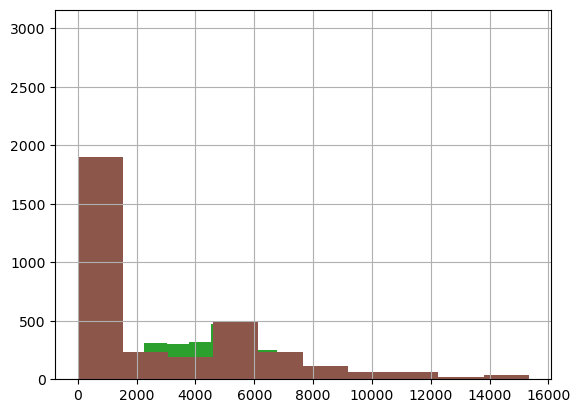

In [140]:
# please inspect these features in the dataset
# - nat_res_depl_perc  min:  0.0
# - forest_depl_perc  min:  0.0
# - cooling_degree_days  min:  0.0
# - forest_area_perc  min:  0.0
# - heat_index_35  min:  0.0
# - heating_degree_days  min:  0.0
# - unemployment_total_perc  min:  0.1

columns_to_inspect = ['nat_res_depl_perc', 'forest_depl_perc', 'cooling_degree_days', 'forest_area_perc', 'heat_index_35', 'heating_degree_days', 'unemployment_total_perc']

for col in columns_to_inspect:
    print(col)
    all_vars_clean2[col].hist()
    

<Axes: >

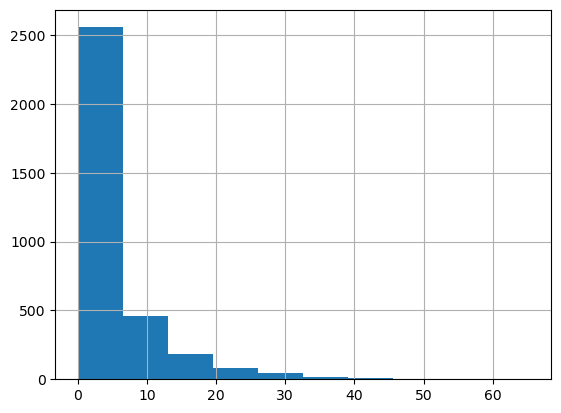

In [141]:
all_vars_clean2['nat_res_depl_perc'].hist()

<Axes: >

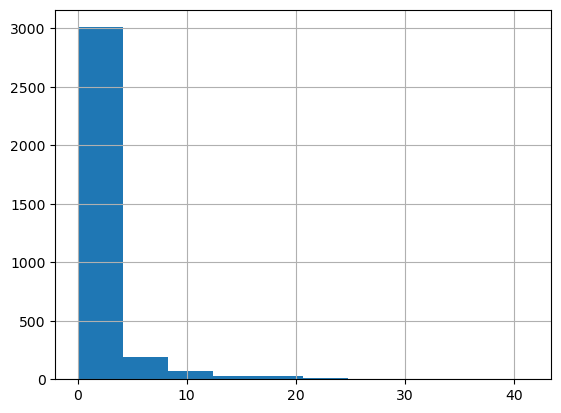

In [142]:
all_vars_clean2['forest_depl_perc'].hist()

<Axes: >

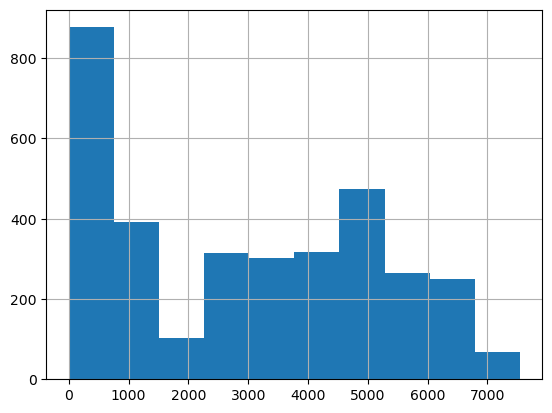

In [143]:
all_vars_clean2['cooling_degree_days'].hist()

<Axes: >

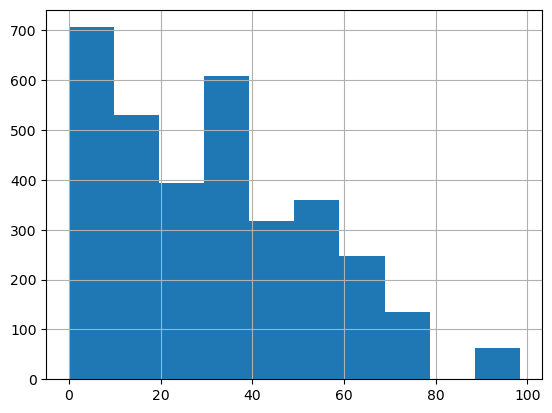

In [144]:
all_vars_clean2['forest_area_perc'].hist()

<Axes: >

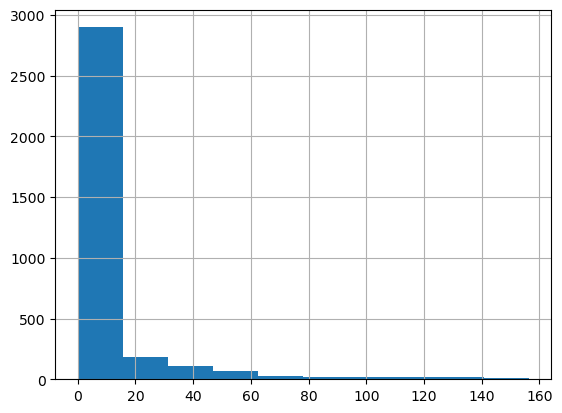

In [145]:
all_vars_clean2['heat_index_35'].hist()

<Axes: >

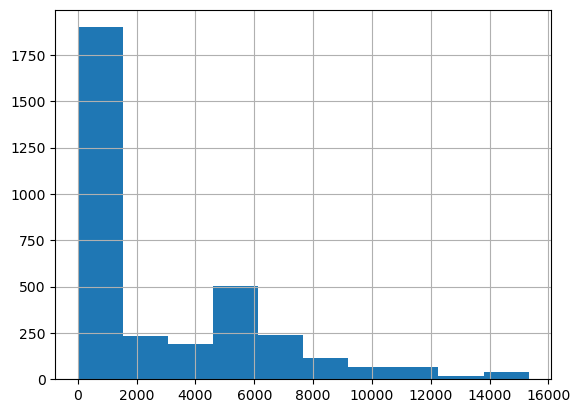

In [146]:
all_vars_clean2['heating_degree_days'].hist()

<Axes: >

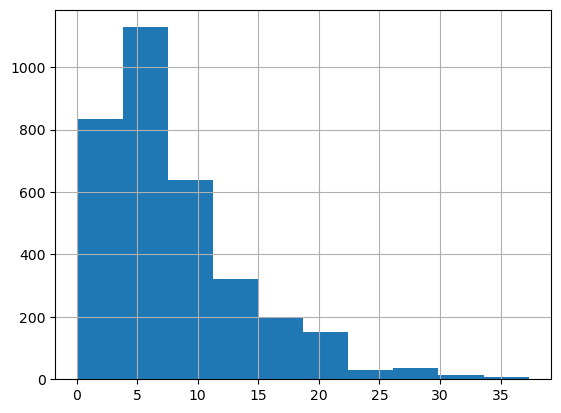

In [147]:
all_vars_clean2['unemployment_total_perc'].hist()


### Before executing we should discuss if the outliers make sense or not

In [148]:
# before executing we should discuss if the outliers make sense or not

# Bestimmen des Durchschnittswerts der Spalten "columns_to_inspect" und ersetzen mit dem Mean
# all_vars_clean3 = all_vars_clean2

# for col in columns_to_inspect:
#     # Bestimmen des Durchschnittswerts der Spalte
#     mean_value = all_vars_clean3[col].mean()
    
#     # Ersetzen des Ausreißers druch den Durchschnittswert
#     min_index = np.argmin(all_vars_clean3[col])
#     all_vars_clean3[min_index, 2] = mean_value
    
# print(all_vars_clean3)


***

## 7. Export of the cleaned data frame to a file

Now that the dataset has been rearranged and cleaned of missing values, it can be exported to a csv file (without the row index) for further analysis:

In [149]:
# export the clean dataframe to a csv file
all_vars_clean2.to_csv('data_cleaned2.csv', index=False)

The further stages of the project are Data Visualization and Predictive Analysis, which can be found in the corresponding notebooks.